<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Inferential Statistics</strong>
<p>This notebook builds on the notebook "EDA-maternal-employment" which can be found in the same repo. In "EDA-maternal-employment" hypotheses regarding influence factors on the maternal employment were put forward and tested with EDA methods. They will be put down here and further tested with inferential methods ONLY if a relationship was indicated in the previous work.</p>
</div>

# <span style="color: #e3db24;">00 | Libraries and Settings</span>

In [ ]:
# 📚 Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🛞 Regression
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [187]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.float_format', '{:,.2f}'.format)
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# <span style="color: #e3db24;">01 | Data Extraction</span>

In [188]:
eda_df = pd.read_excel('data/eda_df.xlsx')
eu_df = pd.read_excel('data/eu_df.xlsx')

In [189]:
eu_df.head()

,country,gdp,fertility,unemployment,spending_family_benefits,pay_gap,age_first_child,women_15-49,emp_women,emp_men,emp_women_pt,emp_men_pt,manager_women,edu_women_score,edu_women_cat,emp_mothers_partnered,emp_mothers_single,fathers_full_paid_leave,mothers_full_paid_leave,emp_pt_maternal,emp_ft_maternal,emp_maternal
0,Austria,38560,1.48,5.30,2.70,12.14,29.70,37.20,70.30,77.90,50.10,12.20,35.50,2.10,High,75.83,73.27,9.39,51.20,40.38,35.18,75.56
1,Belgium,37170,1.60,5.30,2.06,1.11,29.20,37.20,63.30,69.90,38.10,10.70,35.40,2.21,High,77.99,64.04,6.65,15.05,19.72,55.63,75.53
2,Bulgaria,7730,1.58,4.40,1.59,8.81,26.40,33.30,67.40,73.90,1.50,1.30,38.30,2.11,High,71.95,67.10,1.93,73.14,0.61,68.52,71.13
3,Croatia,14630,1.58,6.00,1.85,3.21,29.00,35.20,62.10,69.40,4.50,3.00,28.90,2.07,Medium,77.43,81.50,7.87,47.62,3.87,73.13,77.79
4,Cyprus,28790,1.39,5.70,0.93,20.84,30.00,43.50,71.40,79.30,10.90,5.80,21.00,2.28,High,74.37,64.38,1.44,15.84,7.63,65.54,73.18


In [190]:
eda_df.head()

,country,emp_maternal,spending_family_benefits,fathers_full_paid_leave,emp_mothers_partnered,emp_mothers_single,edu_women_score,edu_women_cat,manager_women,emp_men_pt,pay_gap,spending_category
0,Austria,75.56,2.70,9.39,75.83,73.27,2.10,High,35.50,12.20,12.14,High
1,Belgium,75.53,2.06,6.65,77.99,64.04,2.21,High,35.40,10.70,1.11,Medium-High
2,Bulgaria,71.13,1.59,1.93,71.95,67.10,2.11,High,38.30,1.30,8.81,Medium-Low
3,Croatia,77.79,1.85,7.87,77.43,81.50,2.07,Medium,28.90,3.00,3.21,Medium-Low
4,Cyprus,73.18,0.93,1.44,74.37,64.38,2.28,High,21.00,5.80,20.84,Low


## <span style="color: #ec7511;">Copy as Best Practice</span>

In [191]:
inf_df = eda_df.copy()
regression_all = eu_df.copy()

# <span style="color: #e3db24;">02 | Hypothesis Testing</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Overview Hypotheses:</strong>
<p>These are the four hypotheses for which the EDA analysis before indicated confirmation and a relationship between the variables.</p>
<ul>
    <li><strong>H2:</strong> Mothers in partnerships have a higher employment rate than single mothers. This difference is smaller in countries with higher spending on family benefits.</li>
    <li><strong>H3:</strong> Countries with longer fully paid parental leave for fathers have a higher maternal employment rate.</li>
    <li><strong>H4:</strong> The higher the education level of women in a country, the higher the maternal employment rate.</li>
    <li><strong>H6:</strong> In countries where more men work part-time, maternal employment rates are higher.</li>
</ul>
<p>In the following, I will analyse the detected relationship with inferential methods like t-tests, ANOVA and linear regression. Afterwards, I will build a comprehensive modell for a multiple regression which also includes control variables like GDP, unemployment and several more parameters.</p>
</div>

## <span style="color: #ec7511;">Hypothesis 2:</span>
<p>Mothers in partnerships have a higher employment rate than single mothers. This difference is smaller in countries with higher spending on family benefits.</p>

### <span style="color: #ec300e;">Independent Two Sample T-Test Between Single and Partnered Mothers</span>

In [192]:
# two sample t-test for the means of two independent samples
group1 = eda_df["emp_mothers_single"]
group2 = eda_df["emp_mothers_partnered"]

t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-Statistik: {t_stat:.3f}")
print(f"p-Wert: {p_value:.3f}")
print("")

if p_value < 0.05:
    print("\n🚨 Significant difference between the means of the two groups (p < 0.05)")
else:
    print("\n❎ No significant difference between the means of the two group (p >= 0.05)")

T-Statistik: -1.759
p-Wert: 0.085


❎ No significant difference between the means of the two group (p >= 0.05)


### <span style="color: #ec300e;">One Way ANOVA on the Impact of Public Spending on the Employment Rate of Single/Partnered Mothers</span>

In [193]:
# ANOVA for single mothers
anova_single = stats.f_oneway(
    eda_df[eda_df["spending_category"] == "Low"]["emp_mothers_single"],
    eda_df[eda_df["spending_category"] == "Medium-Low"]["emp_mothers_single"],
    eda_df[eda_df["spending_category"] == "Medium-High"]["emp_mothers_single"],
    eda_df[eda_df["spending_category"] == "High"]["emp_mothers_single"]
)

# ANOVA for partnered mothers
anova_partnered = stats.f_oneway(
    eda_df[eda_df["spending_category"] == "Low"]["emp_mothers_partnered"],
    eda_df[eda_df["spending_category"] == "Medium-Low"]["emp_mothers_partnered"],
    eda_df[eda_df["spending_category"] == "Medium-High"]["emp_mothers_partnered"],
    eda_df[eda_df["spending_category"] == "High"]["emp_mothers_partnered"]
)

# Ergebnisse ausgeben
print("ANOVA for Single Mothers")
print(f"F-value: {anova_single.statistic:.3f}, p-value: {anova_single.pvalue:.3f}")
print("\nANOVA for Partnered Mothers")
print(f"F-value: {anova_partnered.statistic:.3f}, p-value: {anova_partnered.pvalue:.3f}")

# Interpretation
alpha = 0.05
if anova_single.pvalue < alpha:
    print("\n🚨 There is a significant difference in the employment rate of single mothers between the categories of spending on family benefits.")
else:
    print("\n❎ There is NO significant difference in the employment rate of single mothers between the categories of spending on family benefits.")

if anova_partnered.pvalue < alpha:
    print("\n🚨 There is a significant difference in the employment rate of partnered mothers between the categories of spending on family benefits.")
else:
    print("\n❎ There is NO significant difference in the employment rate of partnered mothers between the categories of spending on family benefits.")


ANOVA for Single Mothers
F-value: 1.699, p-value: 0.198

ANOVA for Partnered Mothers
F-value: 0.123, p-value: 0.946

❎ There is NO significant difference in the employment rate of single mothers between the categories of spending on family benefits.

❎ There is NO significant difference in the employment rate of partnered mothers between the categories of spending on family benefits.


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>No significant relationship between the public spending on family benefits on the differnce in single and partnered maternal employment.</strong>
</div>

## <span style="color: #ec7511;">Hypothesis 3:</span>
<p>Countries with longer fully paid parental leave for fathers have a higher maternal employment rate.</p>

### <span style="color: #ec300e;">OLS Regression of Paternal Leave on Maternal Employment</span>

In [194]:
# independent variable (predictor)
X = eda_df["fathers_full_paid_leave"]
X = sm.add_constant(X)  # add constant term (intercept, the predicted y value when x=0)

# dependent variable (target)
y = eda_df["emp_maternal"]

# OLS regression
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           emp_maternal   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.144
Date:                Thu, 13 Feb 2025   Prob (F-statistic):              0.157
Time:                        13:13:02   Log-Likelihood:                -83.424
No. Observations:                  25   AIC:                             170.8
Df Residuals:                      23   BIC:                             173.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>No significant relationship between the paternal leave on maternal employment.</strong>
</div>

## <span style="color: #ec7511;">Hypothesis 4:</span>
<p>The higher the education level of women in a country, the higher the maternal employment rate.</p>

### <span style="color: #ec300e;">One Way ANOVA on the Effect of Different Education Level Categories on Maternal Employment</span>

In [195]:
# ANOVA for influence of edu_women_cat on emp_maternal
anova_edu = stats.f_oneway(
    eda_df[eda_df["edu_women_cat"] == "Low"]["emp_maternal"],
    eda_df[eda_df["edu_women_cat"] == "Medium"]["emp_maternal"],
    eda_df[eda_df["edu_women_cat"] == "High"]["emp_maternal"]
)

print("ANOVA for the influence of edu_women_cat on emp_maternal")
print(f"F-value: {anova_edu.statistic:.3f}, p-value: {anova_edu.pvalue:.3f}")

# Interpretation
alpha = 0.05
if anova_edu.pvalue < alpha:
    print("\n🚨 There is a significant difference in the employment rate of mothers between the different categories of education levels.")
else:
    print("\n❎  There is NO significant difference in the employment rate of mothers between the different categories of education levels.")

ANOVA for the influence of edu_women_cat on emp_maternal
F-value: 2.776, p-value: 0.084

❎  There is NO significant difference in the employment rate of mothers between the different categories of education levels.


### <span style="color: #ec300e;">OLS Regression on the Effect of Different Education Level Scores on Maternal Employment</span>

In [196]:
# independent variable (predictor)
X = eda_df["edu_women_score"]
X = sm.add_constant(X)  # add constant term (intercept, the predicted y value when x=0)

# dependent variable (target)
y = eda_df["emp_maternal"]

# OLS regression
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           emp_maternal   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     6.361
Date:                Thu, 13 Feb 2025   Prob (F-statistic):             0.0190
Time:                        13:13:02   Log-Likelihood:                -81.486
No. Observations:                  25   AIC:                             167.0
Df Residuals:                      23   BIC:                             169.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              24.7332     19.777     

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Significant relationship between the education level of women (score) and maternal employment.</strong>
    <ul>
        <li>OLS interpretation: 18.3% of emp_maternal is explained by education level score. The coefficient of 23.19 shows: an increase of 1 point in the education score would lead to an increase in the employment rate of 23.2 %.</li>
    </ul>
</div>

## <span style="color: #ec7511;">Hypothesis 6:</span>
<p>In countries where more men work part-time, maternal employment rates are higher.</p>

### <span style="color: #ec300e;">OLS Regression on the Effect of Male Part-Time Employment Rate on Maternal Employment</span>

In [197]:
# independent variable (predictor)
X = eda_df["emp_men_pt"]
X = sm.add_constant(X)  # add constant term (intercept, the predicted y value when x=0)

# dependent variable (target)
y = eda_df["emp_maternal"]

# OLS regression
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           emp_maternal   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.537
Date:                Thu, 13 Feb 2025   Prob (F-statistic):              0.125
Time:                        13:13:02   Log-Likelihood:                -83.231
No. Observations:                  25   AIC:                             170.5
Df Residuals:                      23   BIC:                             172.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.9265      2.650     26.761      0.0

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>No significant relationship between the rate of men who work part-time and the maternal employment rate.</strong>
</div>

# <span style="color: #e3db24;">03 | Multiple Linear Regression</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Next Steps:</strong>
<p>Approach: In the following, I will first try an OLS regression with all num features without any changes to hve a baseline model. Afterwards, I will check all assumptions for a linear regression step by step, try to improve the model and re-calculate the regression after each step:</p>
    <ol>
        <li>Drop columns which refer to employment rates.</li>
        <li>No or little multicollinearity between the predictors.</li>
        <li>Standardize scales.</li>
        <li>Linearity between dependent variable and independent variables.</li>
        <li>If necessary: homoscedascity and independence of residuals</li>
    </ol>
</div>

In [198]:
eu_df.head().T

,0,1,2,3,4
country,Austria,Belgium,Bulgaria,Croatia,Cyprus
gdp,38560,37170,7730,14630,28790
fertility,1.48,1.60,1.58,1.58,1.39
unemployment,5.30,5.30,4.40,6.00,5.70
spending_family_benefits,2.70,2.06,1.59,1.85,0.93
pay_gap,12.14,1.11,8.81,3.21,20.84
age_first_child,29.70,29.20,26.40,29.00,30.00
women_15-49,37.20,37.20,33.30,35.20,43.50
emp_women,70.30,63.30,67.40,62.10,71.40
emp_men,77.90,69.90,73.90,69.40,79.30


In [199]:
eu_df.columns

Index(['country', 'gdp', 'fertility', 'unemployment',
       'spending_family_benefits', 'pay_gap', 'age_first_child', 'women_15-49',
       'emp_women', 'emp_men', 'emp_women_pt', 'emp_men_pt', 'manager_women',
       'edu_women_score', 'edu_women_cat', 'emp_mothers_partnered',
       'emp_mothers_single', 'fathers_full_paid_leave',
       'mothers_full_paid_leave', 'emp_pt_maternal', 'emp_ft_maternal',
       'emp_maternal'],
      dtype='object')

In [200]:
regression_df_first = eu_df[['country', 'gdp', 'fertility', 'unemployment',
       'spending_family_benefits', 'pay_gap', 'age_first_child', 'women_15-49',
       'emp_women', 'emp_men', 'emp_women_pt', 'emp_men_pt', 'manager_women',
       'edu_women_score', 'emp_mothers_partnered',
       'emp_mothers_single', 'fathers_full_paid_leave',
       'mothers_full_paid_leave', 'emp_pt_maternal', 'emp_ft_maternal',
       'emp_maternal']]

## <span style="color: #ec7511;">First Linear Regression Model (OLS)</span>

In [201]:
# ols regression for all numerical columns
regression_1 = regression_df_first.select_dtypes(include=[np.number])

# define independent and dependent variables
X = regression_1.drop(columns=["emp_maternal"])
y = regression_1["emp_maternal"]

# add constant term
X = sm.add_constant(X)

# execute OLS regression
model = sm.OLS(y, X).fit()

print("\n--- Regression Summary ---")
print(model.summary())


--- Regression Summary ---
                            OLS Regression Results                            
Dep. Variable:           emp_maternal   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     757.0
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           2.26e-07
Time:                        13:13:02   Log-Likelihood:                 15.021
No. Observations:                  25   AIC:                             9.957
Df Residuals:                       5   BIC:                             34.33
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions: First OLS (Baseline Model)</strong>
<p>The regression model is strongly <strong>overfitted and therefore not useful</strong>. I will list the specific problems and then start trying to solve them step by step:</p>
    <ul>
        <li>Overfitting: model explains 100% and the significance level is very high but almost none of the predictors are significant by themselves.</li>
        <li>The only predictors with a p-value of < 0.5 are emp_mothers_partnered and emp_mothers_single which are very close to the target and therefore contribute to the overfitting.</li>
        <li>As the condition number is very large either high multicollinearity or extremely differently scaled data is highly likely.</li>
    </ul>
</div>

## <span style="color: #ec7511;">Improving the Model</span>

### <span style="color: #ec300e;">01 | Dropping Features Referring to Employment Rates</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>First Improvement:</strong>
<p>Drop all other columns which refer to employment rates, because they are too similar to the target.</p>
</div>

In [202]:
# dropping columns which refer to employment rates
regression_df_second = regression_df_first.drop(columns=['emp_women', 'emp_men', 'emp_women_pt', 'emp_men_pt', 'emp_mothers_partnered',
       'emp_mothers_single', 'emp_pt_maternal', 'emp_ft_maternal'])

# ols regression for all numerical columns
regression_2 = regression_df_second.select_dtypes(include=[np.number])

# define independent and dependent variables
X = regression_2.drop(columns=["emp_maternal"])
y = regression_2["emp_maternal"]

# add constant term
X = sm.add_constant(X)

# execute OLS regression
model = sm.OLS(y, X).fit()

print("\n--- Regression Summary ---")
print(model.summary())


--- Regression Summary ---
                            OLS Regression Results                            
Dep. Variable:           emp_maternal   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     2.109
Date:                Thu, 13 Feb 2025   Prob (F-statistic):              0.101
Time:                        13:13:02   Log-Likelihood:                -71.738
No. Observations:                  25   AIC:                             167.5
Df Residuals:                      13   BIC:                             182.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions: Not overfitted anymore, but...</strong>
<p>The overfitting was solved, yet now the model is not significant anymore and the condition number still is very high.</p>
    <ul>
        <li>No more overfitting because I erased the "fake significance" which was caused by predictors too similar to the target.</li>
        <li>R² adjusted is a lot lower than R²: unneccessary predictors.</li>
        <li>No significance: p-value > 0.1.</li>
        <li>High multicollinearity suspected, this will be checked next.</li>
    </ul>
<p>Please note: Three predictors stick out because they show a p-value < 0.05: unemployment, edu_women_score and fathers_full_paid_leave. We will come back to them later.</p>
</div>

### <span style="color: #ec300e;">02 | Checking Multicollinearity</span>

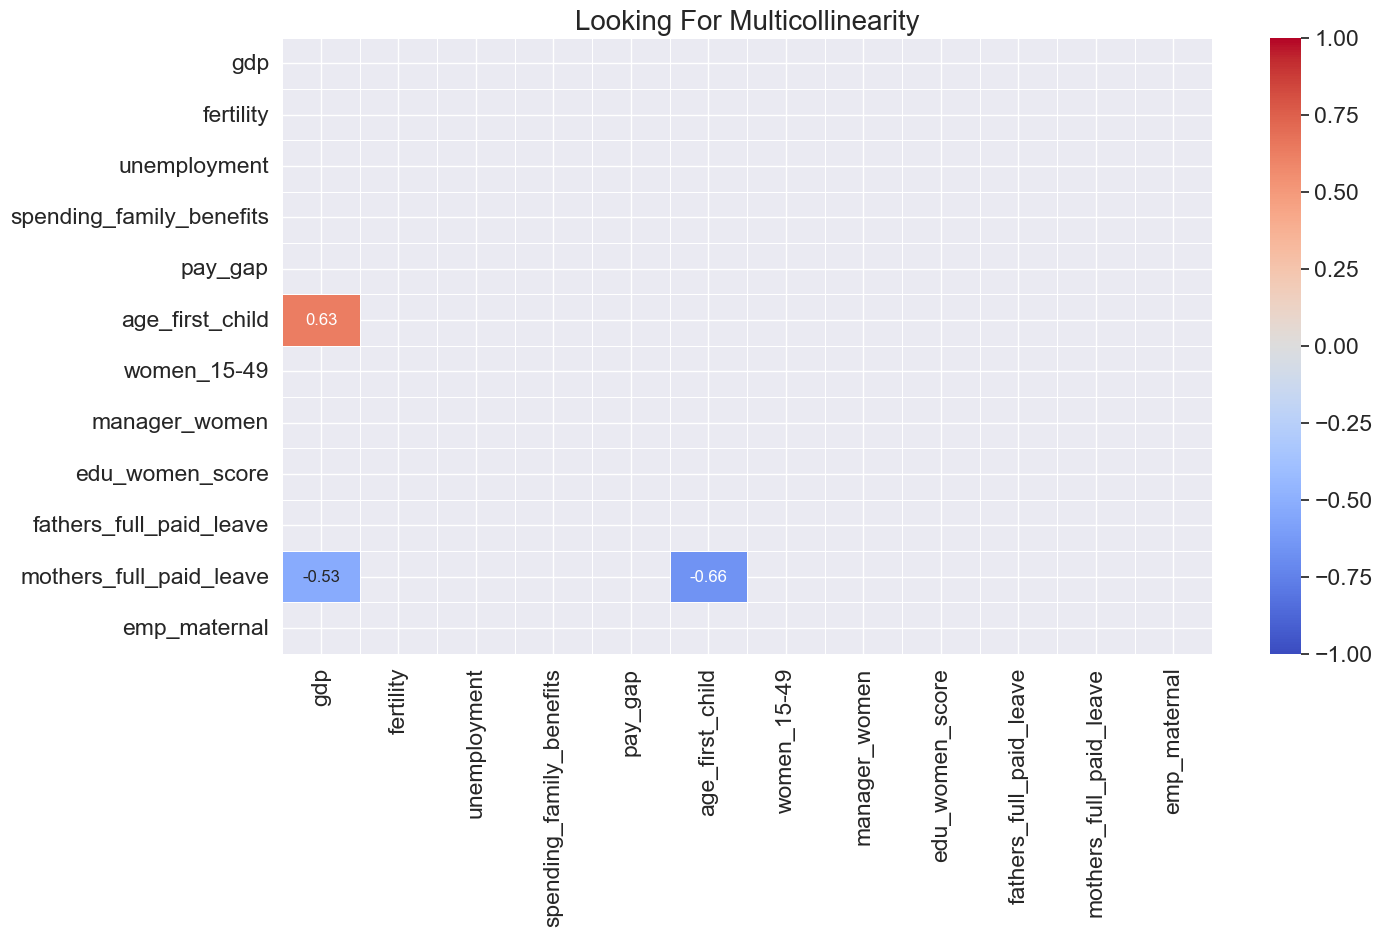

In [203]:
regression_2_corr = round(regression_2.corr(), 2)

# correlation matrix heatmap with shows only correlations > 0.5 or < -0.5
regression_2_corr = regression_2_corr.where((regression_2_corr > 0.5) | (regression_2_corr < -0.5))

# correlation matrix heatmap which shows only half of numbers (so no doubles)
mask = np.zeros_like(regression_2_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True # hide the upper triangle
f, ax = plt.subplots(figsize=(15, 8))
sns.set(font_scale=1.5)
ax = sns.heatmap(regression_2_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax, vmin=-1, vmax=1) 
ax.set_title("Looking For Multicollinearity", fontsize=20)
plt.show()

In [204]:
# VIF for all numerical columns

# define independent variables (all but target)
X = regression_2.drop(columns=["emp_maternal"])

# add constant term
X = sm.add_constant(X)

# calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)

                     Feature      VIF
0                      const 7,400.96
6            age_first_child     7.46
1                        gdp     7.14
7                women_15-49     2.91
2                  fertility     2.48
8              manager_women     2.15
3               unemployment     2.13
11   mothers_full_paid_leave     2.07
9            edu_women_score     1.95
10   fathers_full_paid_leave     1.73
5                    pay_gap     1.70
4   spending_family_benefits     1.58


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Next Steps:</strong>
<p>drop age_first_child, the multicollinearity is not very high but also the correlation with emp_maternal is almost 0, so there is no added value.</p>
</div>

In [205]:
# dropping age_first_child
regression_df_third = regression_df_second.drop(columns=['age_first_child'])

# ols regression for new set of columns
regression_3 = regression_df_third.select_dtypes(include=[np.number])

# define independent variables (all but target)
X = regression_3.drop(columns=["emp_maternal"])

# add constant term
X = sm.add_constant(X)

# calculate VIF again to make sure all factors are below 5
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)

                     Feature    VIF
0                      const 765.67
1                        gdp   3.18
6                women_15-49   2.64
2                  fertility   1.93
10   mothers_full_paid_leave   1.93
8            edu_women_score   1.81
9    fathers_full_paid_leave   1.73
5                    pay_gap   1.70
4   spending_family_benefits   1.56
3               unemployment   1.56
7              manager_women   1.54


In [206]:
# define independent variables (all but target)
X = regression_3.drop(columns=["emp_maternal"])
y = regression_3["emp_maternal"]

# add constant term
X = sm.add_constant(X)

# execute OLS regression
model = sm.OLS(y, X).fit()

print("\n--- Regression Summary ---")
print(model.summary())


--- Regression Summary ---
                            OLS Regression Results                            
Dep. Variable:           emp_maternal   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     2.088
Date:                Thu, 13 Feb 2025   Prob (F-statistic):              0.101
Time:                        13:13:03   Log-Likelihood:                -73.127
No. Observations:                  25   AIC:                             168.3
Df Residuals:                      14   BIC:                             181.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [207]:
regression_3.columns

Index(['gdp', 'fertility', 'unemployment', 'spending_family_benefits',
       'pay_gap', 'women_15-49', 'manager_women', 'edu_women_score',
       'fathers_full_paid_leave', 'mothers_full_paid_leave', 'emp_maternal'],
      dtype='object')

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions: Not significant</strong>
    <ul>
        <li>As the R² Adjusted is a lot lower than R², this indicates unneccessary predictors.</li>
        <li>The high condition number indicates a scaling problem.</li>
    </ul>
</div>

### <span style="color: #ec300e;">03 | Checking Linearity Between Target and Predictors</span>

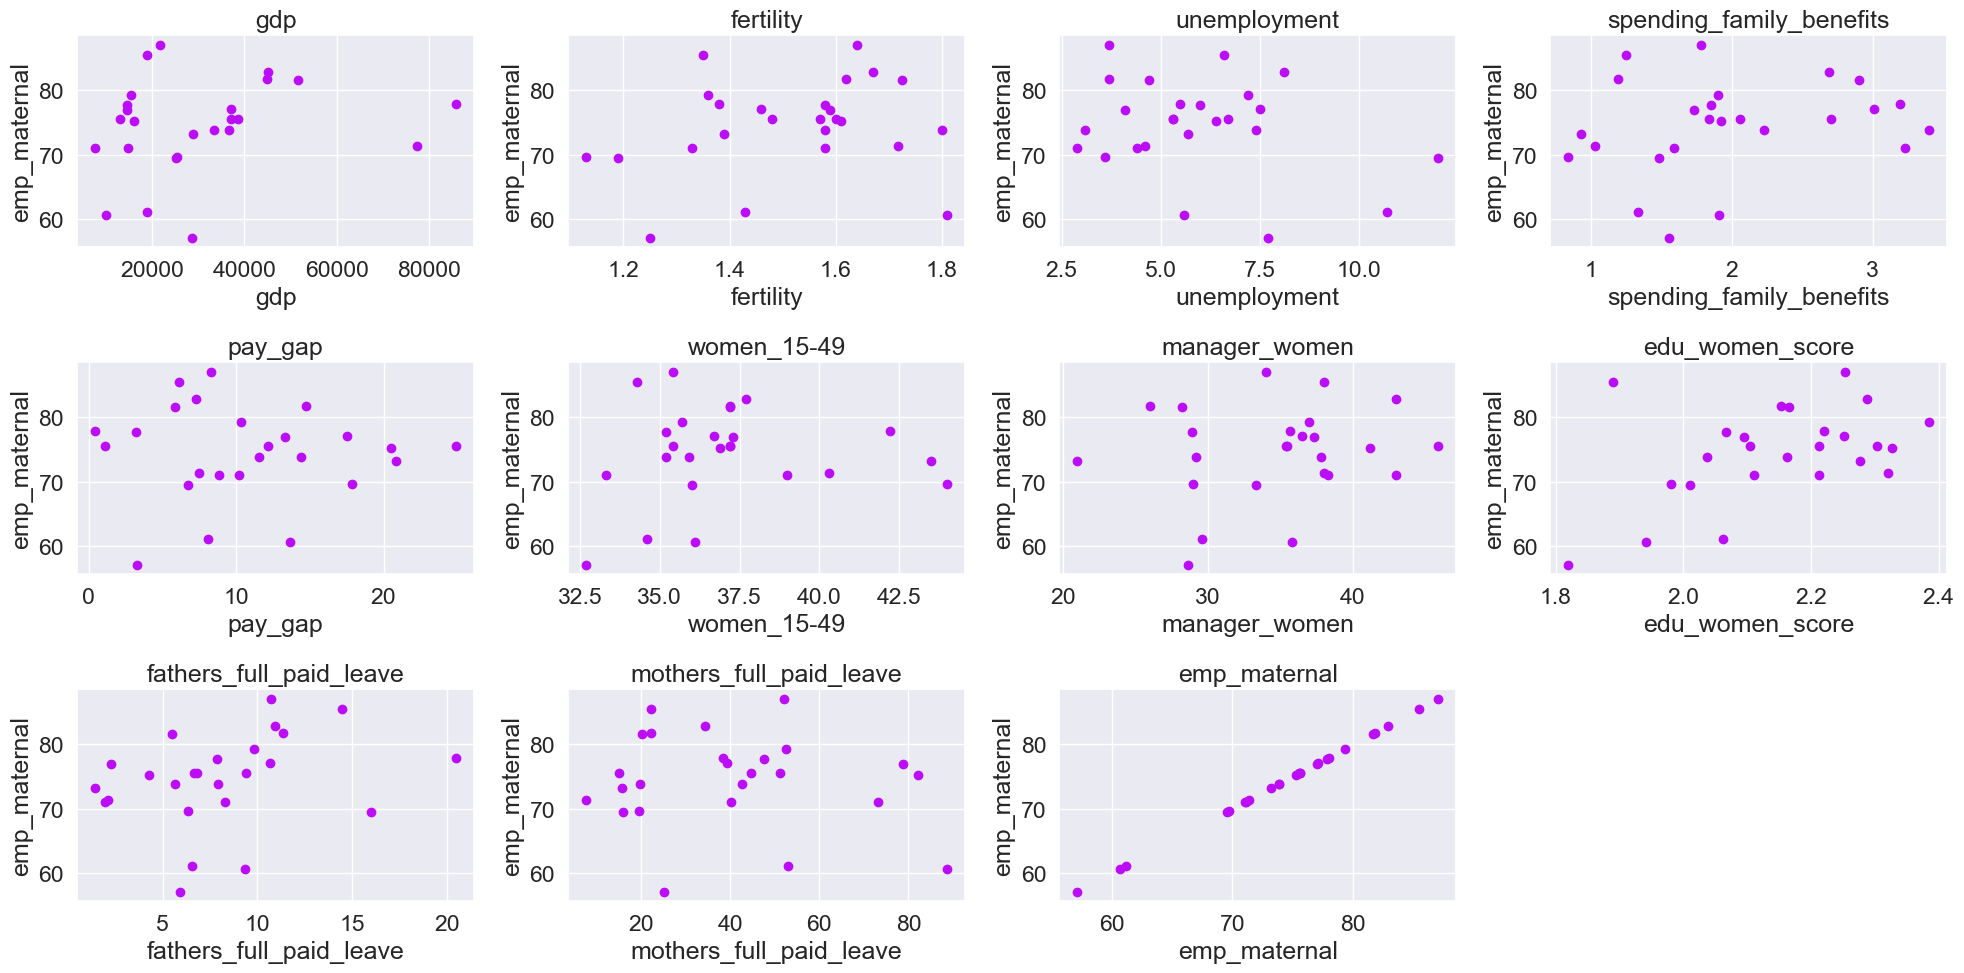

In [208]:
# scatterplots for all num columns

color = '#bb0df7'

# grid size
nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(regression_3.columns):
        ax.set_visible(False)
        continue
    ax.scatter(regression_3.iloc[:, i], regression_3['emp_maternal'], color=color)
    ax.set_title(regression_3.columns[i])
    ax.set_xlabel(regression_3.columns[i])
    ax.set_ylabel('emp_maternal')

plt.tight_layout()
plt.show()

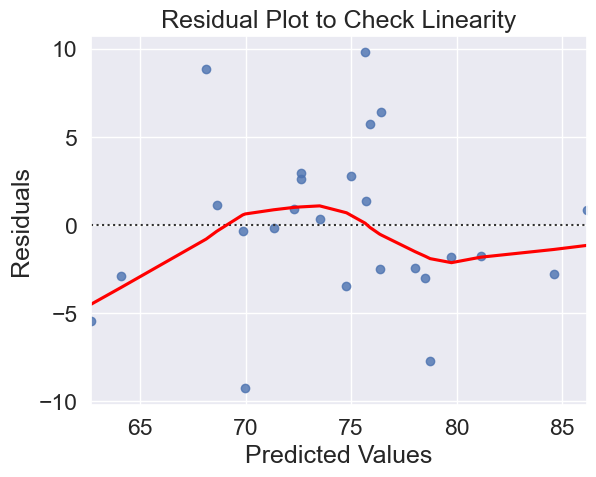

In [209]:
# residual plot

# predict y values
X = sm.add_constant(regression_3.drop(columns=['emp_maternal']))
y = regression_3['emp_maternal']

model = sm.OLS(y, X).fit()

# residuals vs. fitted values
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={"color": "red"})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot to Check Linearity")
plt.show()

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions: No linearity for most columns</strong>
<p>Here we can  see that a linear regression is the wrong path for the whole set of variables as the relationships between most predictors and the target are not linear. I will proceed as follows:</p>
    <ul>
        <li>Calulate an OLS regression with only those <strong>three predictors which show at least some traces of a linear relationship with the target and also before showed a p-value of < 0.05</strong>. This is true for: unemployment, edu_women_score and  fathers_full_paid_leave.</li>
        <li>Before doing so, I will also check if standardizing improves the model with three predictors because these three are <strong>very differently scaled</strong> (unemployment: %, edu_women_score: artificial score, father_full_pais_leave: weeks).</li>
    </ul>
</div>

### <span style="color: #ec300e;">04 | New Set of Features & Checking The Scales</span>

#### <span style="color: #bb1010;">OLS Regression: Only three predictors (unstandardized)</span>

In [210]:
# ols regression for only three predictors
regression_4 = regression_3[["unemployment", "edu_women_score", "fathers_full_paid_leave", "emp_maternal"]]

# define independent variables (all but target) and dependent variable (target)
X = regression_4.drop(columns=["emp_maternal"])
y = regression_4["emp_maternal"]

# add constant term
X = sm.add_constant(X)

# execute OLS regression
model = sm.OLS(y, X).fit()

print("\n--- Regression Summary ---")
print(model.summary())


--- Regression Summary ---
                            OLS Regression Results                            
Dep. Variable:           emp_maternal   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     6.075
Date:                Thu, 13 Feb 2025   Prob (F-statistic):            0.00383
Time:                        13:13:05   Log-Likelihood:                -76.728
No. Observations:                  25   AIC:                             161.5
Df Residuals:                      21   BIC:                             166.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

#### <span style="color: #bb1010;">OLS Regression: Only three predictors (standardized)</span>

In [211]:
# define independent variables (all but target) and dependent variable (target)
X = regression_4.drop(columns=["emp_maternal"])
y = regression_4["emp_maternal"]

# standardize the predictors
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) # keep column names

# add constant term
X_standardized = sm.add_constant(X_standardized)

# target variable not standardized
y = regression_4['emp_maternal']

# OLS regression
model_standardized = sm.OLS(y, X_standardized).fit()

print("\n--- Regression Summary ---")
print(model_standardized.summary())


--- Regression Summary ---
                            OLS Regression Results                            
Dep. Variable:           emp_maternal   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     6.075
Date:                Thu, 13 Feb 2025   Prob (F-statistic):            0.00383
Time:                        13:13:05   Log-Likelihood:                -76.728
No. Observations:                  25   AIC:                             161.5
Df Residuals:                      21   BIC:                             166.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

# <span style="color: #e3db24;">04 | Reporting</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Summary of Significant Relationships:</strong>
<p>A set of three predictors were found to have an influence on the maternal employment rate.</p>
    <ul>
        <li>The predictors are: <strong>unemployment, the education score of women and the length of fully paid paternal leave</strong>.</li>
        <li>The relationship is <strong>highly significant</strong> (p-value 0.004).</li>
        <li>The three predictors <strong>explain 38.8% (R² Adjusted)</strong> of the maternal employment rate.</li>
    </ul>
<p>I will first report on the <strong>not standardized</strong> regression model to be able to show effects in the scale of each predictor:</p>
    <ul>
        <li><strong>Negative relationship between unemployment and maternal employment rate</strong>: If the unemployment rate increases by 1 %, the maternal employment rate decreases by 1.25 %.</li>
        <li><strong>Positive relationship between education score of women and maternal employment rate</strong>: If the education score of women increases by 1 point, the maternal employment rate increases by 23.61 %.</li>
        <li><strong>Positive relationship between length of paternal leave and maternal employment rate</strong>: If the length of paternal leave increases by 1 week, the maternal employment rate increases by 0.74 %.</li>
    </ul>
<p>Comparing the <strong>standardized</strong> predictors, we can compare the strength of the effects of the predictors because they are all expressed in standard deviation:</p>
    <ul>
        <li>The <strong>education level of women</strong> has the biggest impact, closely followed by the <strong>paternal leave</strong>. <strong>Unemployment</strong> has the smallest effect.</li>
    </ul>
</div>